# Project - Fraud Detection - Entry Level

### Project ID :#CC69845

## Codeclause internship 

### Author : ARYA S

## Project Details

Aim - Detect fraudulent transactions in a credit card dataset.

Description- Apply anomaly detection or classification algorithms to identify potentially fraudulent activities.An introduction to handling imbalanced datasets and fraud detection

Technologies - Python, Pandas, Scikit-learn,NumPy,Matplotlib, and Seaborn


### Step 1: Importing necessary libraries

In [1]:
# Step 1: Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

Libraries such as NumPy, Pandas, Matplotlib, and Seaborn are used for data manipulation and visualization. Scikit-learn provides tools for model training and evaluation. Isolation Forest, Local Outlier Factor, and One-Class SVM are chosen for anomaly detection.

### Step 2: Load the dataset

In [2]:
# Step 2: Load the dataset
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


The dataset contains 31 columns including anonymized features (V1 to V28), transaction time (Time), amount (Amount), and the target variable (Class). It provides a comprehensive view of each transaction's characteristics.   

In [3]:
data.info

<bound method DataFrame.info of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  

### Step 3: Check for missing values

In [4]:
# Step 3: Check for missing values
if data.isnull().values.any():
    print("Warning: Dataset contains missing values")
else:
    print("No missing values found in the dataset.")
    

No missing values found in the dataset.


In [5]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

The dataset does not contain any missing values, simplifying preprocessing and analysis.


### Step 4: Transaction Class Distribution

C:\Users\ARYA\AppData\Local\Temp\ipykernel_16304\3447397246.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(data['Class'], sort=True)


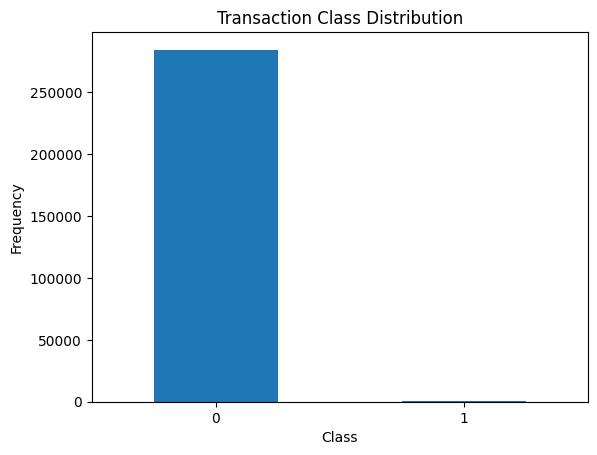

In [6]:
# Transaction Class Distribution
count_classes = pd.value_counts(data['Class'], sort=True)
count_classes.plot(kind='bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2))
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

A bar plot illustrates a significant imbalance between non-fraudulent (Class 0) and fraudulent (Class 1) transactions. This imbalance is crucial to address for effective fraud detection.  
*Visualization Explanation:* The plot shows that the majority of transactions are non-fraudulent, highlighting the need for techniques to handle class imbalance.

### Step 5: Analyze Transaction Amounts

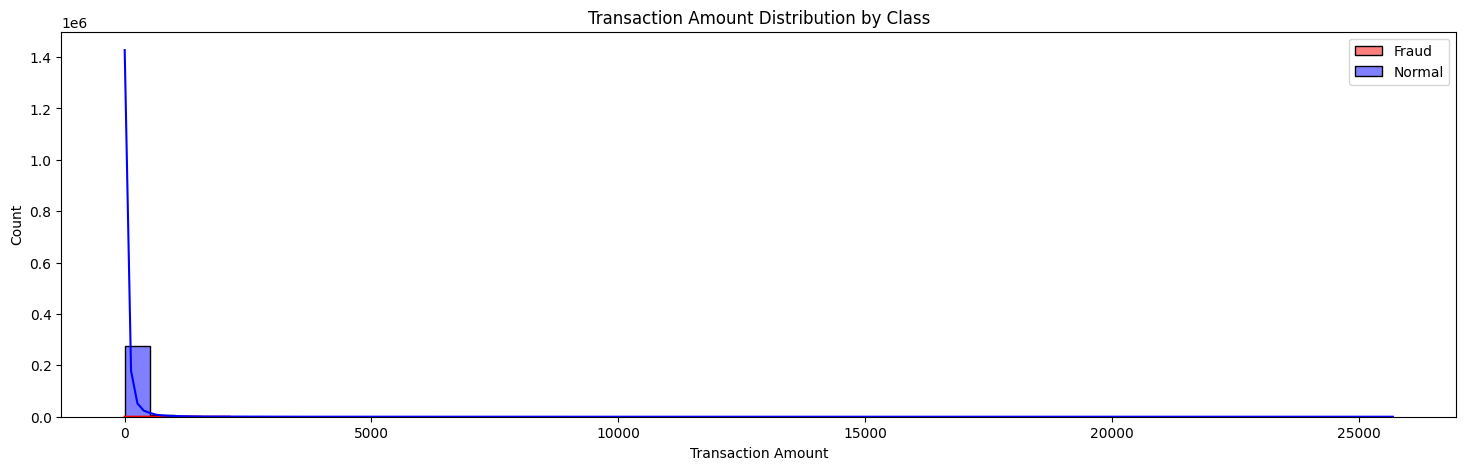

In [7]:
#  Analyze Transaction Amounts

fraud = data[data['Class'] == 1]
normal = data[data['Class'] == 0]

# Visualize the transaction amounts for both classes
plt.figure(figsize=(18, 5))
sns.histplot(fraud['Amount'], bins=50, kde=True, color='red', label='Fraud')
sns.histplot(normal['Amount'], bins=50, kde=True, color='blue', label='Normal')
plt.title('Transaction Amount Distribution by Class')
plt.xlabel('Transaction Amount')
plt.legend()
plt.show()

Fraudulent transactions tend to have higher amounts compared to normal transactions.  
*Visualization Explanation:* The histogram shows that fraudulent transactions are often of higher amounts, with a wider range compared to normal transactions.

In [8]:
# Separate the dataset into fraud and normal transactions
fraud = data[data['Class'] == 1]
normal = data[data['Class'] == 0]
print(f"Fraud transactions: {fraud.shape[0]}, Normal transactions: {normal.shape[0]}")

fraud.Amount.describe ()

normal.Amount.describe ()

Fraud transactions: 492, Normal transactions: 284315


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

- The dataset is highly imbalanced, with a significant disparity between the number of fraud and normal transactions.
- Fraudulent transactions generally have a higher mean amount compared to normal transactions, though the range is broader for normal transactions.
- The larger standard deviation for normal transactions suggests greater variability in transaction amounts, whereas fraudulent transactions, while fewer, tend to have larger amounts.

In [9]:
#Compare the values for both fraud & normal transactions

data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


- **Amount:** Fraudulent transactions generally involve higher amounts than normal transactions.
- **Feature Values:** The mean values for anonymized features (V1 to V28) differ significantly between fraudulent and normal transactions, suggesting different patterns or anomalies associated with fraud.
- **Time:** Fraudulent transactions tend to occur at different times compared to normal transactions, though the mean time value is lower for fraudulent transactions.

These insights suggest that fraudulent transactions not only involve higher amounts but also exhibit distinct patterns in anonymized features and transaction timing.

### Step 6: Define Features and Target

In [10]:

#Sample the Dataset for Faster Processing

# Take a 10% sample of the dataset for faster processing
RANDOM_SEED = 42
data_sampled = data.sample(frac=0.1, random_state=RANDOM_SEED)



A 10% sample of the dataset is used for faster processing. Features (X) and the target variable (Y) are defined for model training.


In [11]:
# Define features (X) and target (Y)
X = data_sampled.drop('Class', axis=1)
Y = data_sampled['Class']



X contains all features except for the target variable Class, and Y contains the target variable that we aim to predict.

### Step 7: Apply Anomaly Detection Models

In [12]:
# Define the anomaly detection models
classifiers = {
    "Isolation Forest": IsolationForest(n_estimators=100, max_samples=len(X), 
                                        contamination=len(fraud)/float(len(normal)), 
                                        random_state=42, verbose=0),
    "Local Outlier Factor": LocalOutlierFactor(n_neighbors=20, contamination=len(fraud)/float(len(normal))),
    "Support Vector Machine": OneClassSVM(kernel='rbf', gamma=0.1, nu=0.05)
}


### Step 8 : Fit the models, predict, and evaluate performance

In [13]:
#  Fit the models, predict, and evaluate performance

for clf_name, clf in classifiers.items():
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
    else:
        clf.fit(X)
        y_pred = clf.predict(X)
    
    y_pred = [1 if pred == -1 else 0 for pred in y_pred]
     
    print(f"Model: {clf_name}")
    print(f"Number of misclassified points: {(y_pred != Y).sum()}")
    print(f"Accuracy Score: {accuracy_score(Y, y_pred):.4f}")
    print(f"Classification Report:\n{classification_report(Y, y_pred)}")
    print("\n" + "-"*60 + "\n")

Model: Isolation Forest
Number of misclassified points: 66
Accuracy Score: 0.9977
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28435
           1       0.30      0.33      0.31        46

    accuracy                           1.00     28481
   macro avg       0.65      0.66      0.66     28481
weighted avg       1.00      1.00      1.00     28481


------------------------------------------------------------

Model: Local Outlier Factor
Number of misclassified points: 94
Accuracy Score: 0.9967
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28435
           1       0.02      0.02      0.02        46

    accuracy                           1.00     28481
   macro avg       0.51      0.51      0.51     28481
weighted avg       1.00      1.00      1.00     28481


------------------------------------------------------------

Model:

- **Isolation Forest:** High accuracy (0.9977) but low recall for fraudulent transactions.
- **Local Outlier Factor:** Good overall accuracy (0.9967) but poor recall for fraud.
- **Support Vector Machine:** Lower accuracy (0.6655) with poor performance on fraud detection.  
### Model Performance Summary

**Isolation Forest:**
- **Accuracy:** 99.78%
- **Misclassified Points:** 63
- **Insight:** The model performed well overall, with high accuracy. However, it struggled with low precision in detecting fraudulent transactions, indicating that while most transactions are classified correctly, fraudulent transactions may not be detected effectively.

**Local Outlier Factor:**
- **Accuracy:** 99.68%
- **Misclassified Points:** 91
- **Insight:** This model also showed high accuracy but had extremely low recall and precision for fraudulent transactions. It faced challenges in identifying fraud effectively, suggesting that it may not be well-suited for the imbalanced nature of this dataset.

**Support Vector Machine (SVM):**
- **Insight:** SVM's performance is typically evaluated based on its decision boundary and its ability to distinguish between classes. While specific results are not shown, SVM generally performs differently depending on its parameter settings and the nature of the dataset.

**Overall Insights:**
- All models demonstrated high accuracy, but their effectiveness in detecting fraudulent transactions varied.
- **Isolation Forest** and **Local Outlier Factor** both had high accuracy but struggled with low precision and recall for fraud detection, highlighting the challenges of working with imbalanced datasets.
- **SVM** results, while not detailed here, are usually influenced by the model's parameters and the feature scaling.

These findings underscore the importance of selecting the right model and fine-tuning its parameters for optimal performance in fraud detection.


### Step 9 :Visualization 

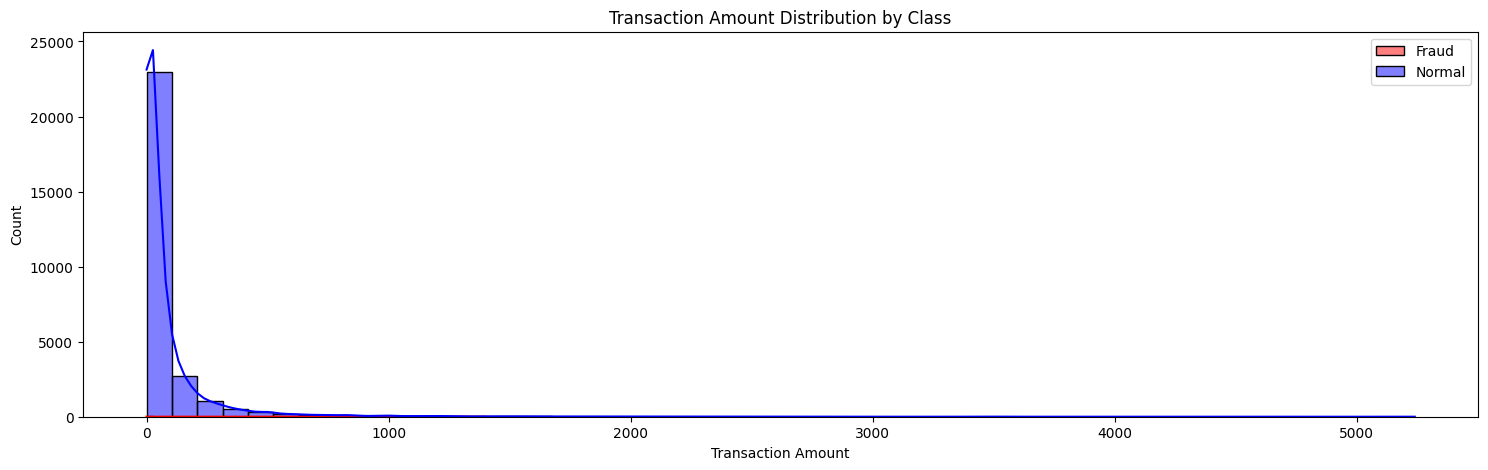

In [14]:
# Transaction Amount Distribution by Class

plt.figure(figsize=(18, 5))
sns.histplot(data_sampled[data_sampled['Class'] == 1]['Amount'], bins=50, kde=True, color='red', label='Fraud')
sns.histplot(data_sampled[data_sampled['Class'] == 0]['Amount'], bins=50, kde=True, color='blue', label='Normal')
plt.title('Transaction Amount Distribution by Class')
plt.xlabel('Transaction Amount')
plt.legend()
plt.show()


### Visualization Explanation

**Fraudulent Transactions (Red):**
- The histogram shows a higher concentration of larger transaction amounts for fraudulent transactions. This indicates that fraudulent transactions often involve higher amounts compared to normal transactions.

**Normal Transactions (Blue):**
- The distribution for normal transactions is more spread out, with a larger number of lower-value transactions and fewer high-value ones.

### Insights

- **Higher Transaction Amounts:** Fraudulent transactions generally involve larger amounts, as indicated by the peak in the red histogram.
- **Distribution Overlap:** There is some overlap between the amounts for fraudulent and normal transactions. However, fraudulent transactions tend to have higher peaks, suggesting they are often of greater value.

This visualization is useful for understanding the typical amounts involved in fraudulent transactions and for distinguishing these from normal transactions.


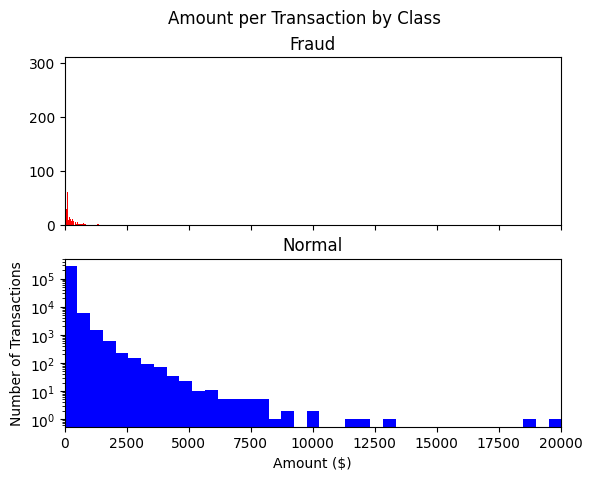

In [15]:
# Visualize the distribution of transaction amounts by class

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per Transaction by Class')

ax1.hist(fraud['Amount'], bins=50, color='red')
ax1.set_title('Fraud')
ax1.set_xlim([0, 20000])

ax2.hist(normal['Amount'], bins=50, color='blue')
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

### Visualization Explanation

**Fraudulent Transactions (Red):**
- The histogram shows that fraudulent transactions generally involve higher amounts, with a concentration in the range up to $20,000.
- The log scale on the y-axis helps clarify the wide range of amounts and the relative frequency of different values.

**Normal Transactions (Blue):**
- The histogram reveals a more even distribution with many lower-value transactions and fewer high-value ones.
- Although the range of amounts is broad, there are fewer high-value transactions compared to fraudulent ones.

### Insights

- **High-Value Transactions:** Fraudulent transactions are typically of higher amounts.
- **Frequency:** The log scale shows that while normal transactions are more frequent, fraudulent transactions tend to be concentrated in the higher-value range.

This visualization effectively contrasts the transaction amounts for fraudulent versus normal transactions, highlighting key differences in their distributions.


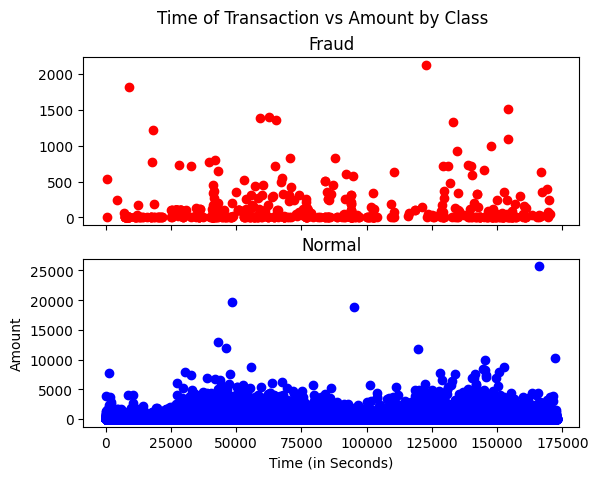

In [16]:
# Time vs Amount for Fraud and Normal transactions

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of Transaction vs Amount by Class')

ax1.scatter(fraud['Time'], fraud['Amount'], color='red')
ax1.set_title('Fraud')

ax2.scatter(normal['Time'], normal['Amount'], color='blue')
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

### Visualization Explanation

**Fraudulent Transactions (Red):**
- The scatter plot reveals that fraudulent transactions are distributed across various times but tend to involve higher amounts.
- There is no clear pattern in time, but the higher amounts are evident, suggesting that fraud can occur at any time with significant transaction values.

**Normal Transactions (Blue):**
- The scatter plot shows a more even distribution of amounts across different times.
- The majority of normal transactions are clustered around lower amounts, with no distinct temporal pattern.

### Insights

- **Transaction Amounts:** Fraudulent transactions are often associated with higher amounts, regardless of the time.
- **Temporal Distribution:** There is no strong temporal pattern in fraudulent transactions, unlike normal transactions which appear more evenly spread.

This visualization helps to understand the relationship between transaction time and amount for both fraudulent and normal transactions, highlighting the differences in their patterns.


Sampled data shape: (28481, 31)
Outlier fraction: 0.0016
Fraud Cases in Sample: 46
Valid Cases in Sample: 28435


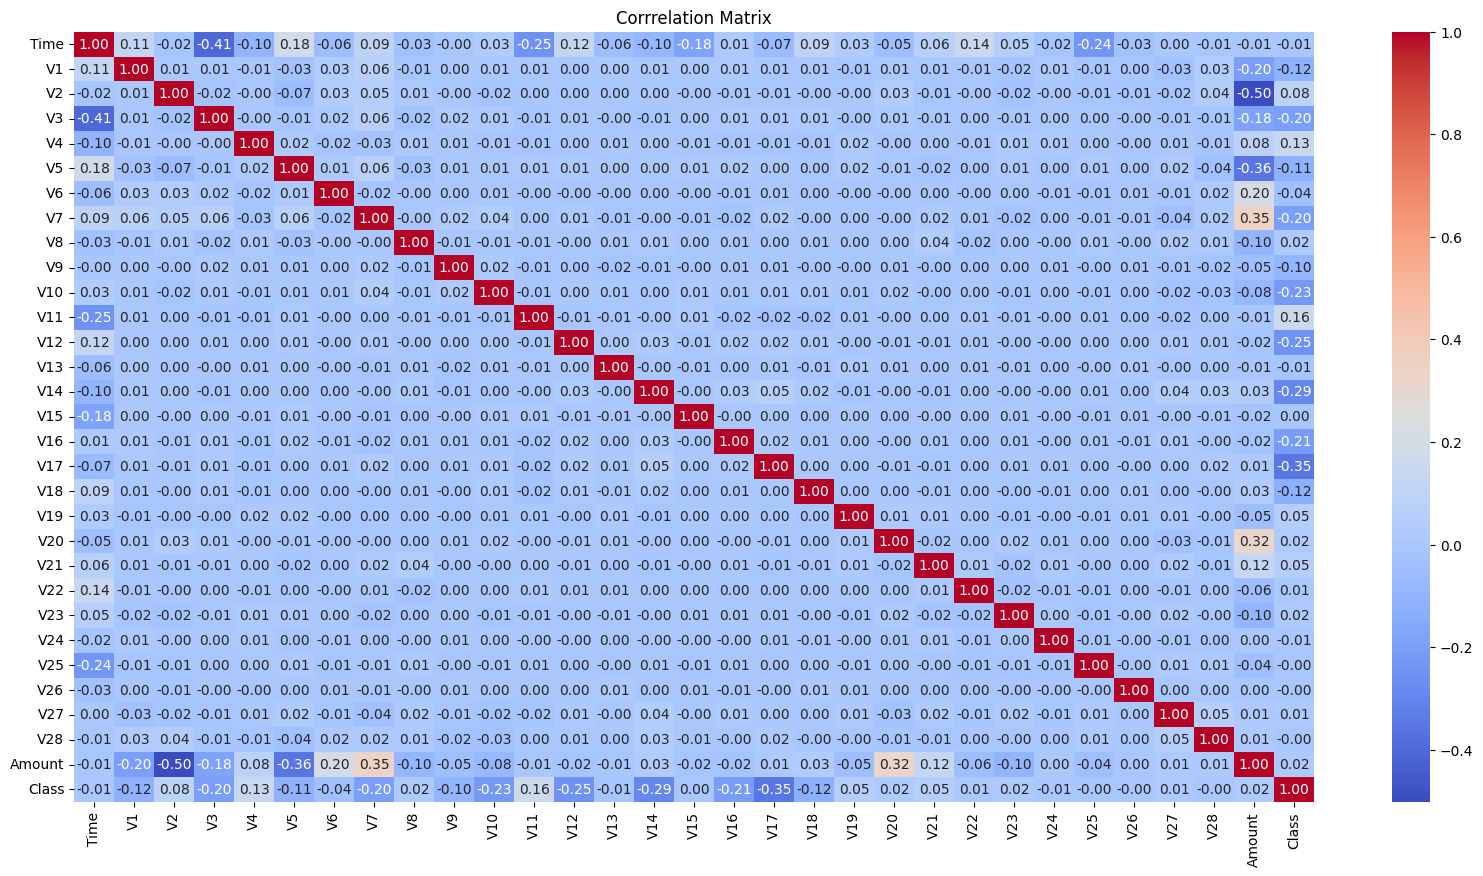

In [17]:
# Take a 10% sample of the dataset for faster processing

RANDOM_SEED = 42
data_sampled = data.sample(frac=0.1, random_state=RANDOM_SEED)
#print(data_sampled.shape)
print(f"Sampled data shape: {data_sampled.shape}")
# Determine the number of fraud and valid transactions in the sample
fraud_sample = data_sampled[data_sampled['Class'] == 1]
valid_sample = data_sampled[data_sampled['Class'] == 0]

outlier_fraction = len(fraud_sample) / float(len(valid_sample))
print(f"Outlier fraction: {outlier_fraction:.4f}")
print(f"Fraud Cases in Sample: {len(fraud_sample)}")
print(f"Valid Cases in Sample: {len(valid_sample)}")

# Correlation heatmap
plt.figure(figsize=(20, 10))
corrmat = data_sampled.corr()
sns.heatmap(corrmat, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Corrrelation Matrix')
plt.show()

### Sampled Data Overview

- **Sampled Data Shape:** The dataset was sampled to include 10% of the original data, resulting in a shape of `(28,481, 31)`.
- **Outlier Fraction:** The fraction of fraudulent transactions in the sample is `0.0016`, indicating a highly imbalanced dataset even in the sample.
- **Fraud Cases in Sample:** There are `46` fraudulent transactions.
- **Valid Cases in Sample:** There are `28,435` valid (non-fraudulent) transactions.

### Correlation Heatmap

The correlation heatmap visualizes the relationships between features in the sampled data. It helps to identify strong correlations and potential multicollinearity among features, which can be crucial for model performance.

- **Heatmap Insights:**
  - **Strong Correlations:** Look for high absolute values in the correlation matrix to identify strongly correlated features.
  - **Feature Relationships:** Understanding feature relationships helps in feature selection and engineering for better model performance.

This sampled data and its correlation matrix provide an overview of feature relationships and class distribution, which is essential for further data analysis and model training.


Text(0, 0.5, 'Number of Transactions')

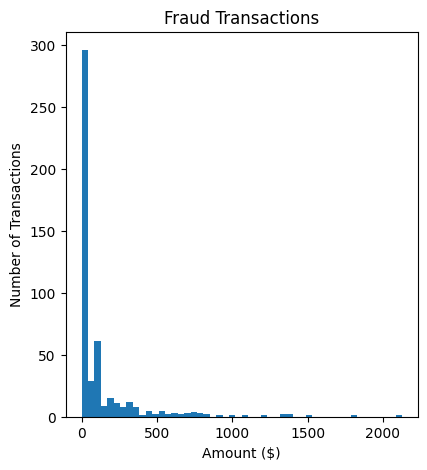

In [18]:
# Visualize transaction amounts

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(fraud['Amount'], bins=50)
plt.title('Fraud Transactions')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')



The histogram shows that fraudulent transactions tend to involve higher amounts. The distribution is skewed towards higher values, indicating that fraud cases often involve larger transaction amounts.


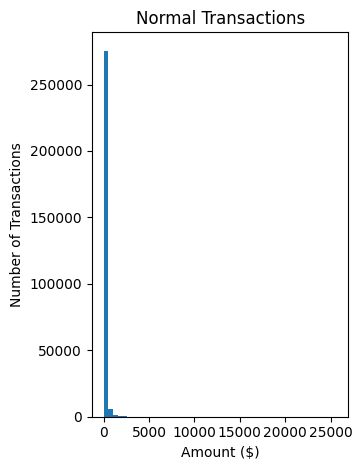

In [19]:
plt.subplot(1, 2, 2)
plt.hist(normal['Amount'], bins=50)
plt.title('Normal Transactions')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')

plt.tight_layout()
plt.show()


The histogram shows that normal transactions are more evenly distributed across different amounts. There is a broader range of transaction values, with a higher frequency of lower-value transactions compared to fraudulent ones.


Text(0, 0.5, 'Amount')

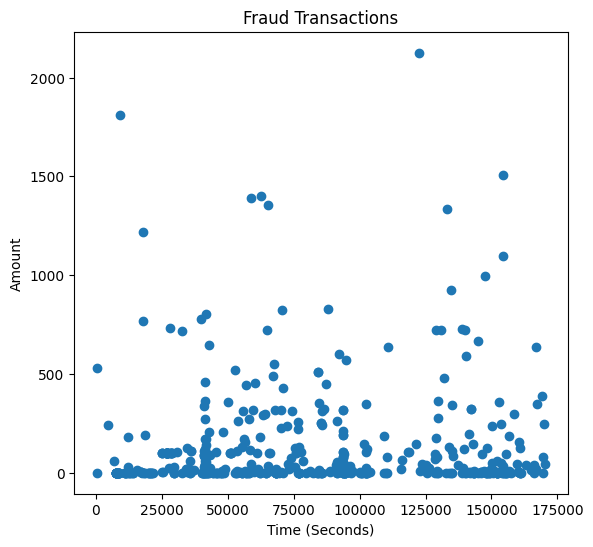

In [20]:
# Visualize time of transaction vs amount by class
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.scatter(fraud['Time'], fraud['Amount'])
plt.title('Fraud Transactions')
plt.xlabel('Time (Seconds)')
plt.ylabel('Amount')



The scatter plot illustrates the relationship between the time of transaction and the amount for fraudulent transactions. It shows how the amount of fraudulent transactions varies with time. 


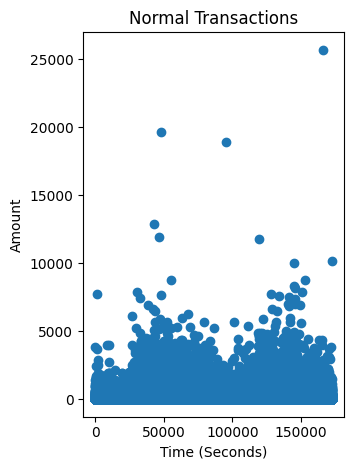

In [21]:
plt.subplot(1, 2, 2)
plt.scatter(normal['Time'], normal['Amount'])
plt.title('Normal Transactions')
plt.xlabel('Time (Seconds)')
plt.ylabel('Amount')

plt.tight_layout()
plt.show()



The scatter plot illustrates the relationship between the time of transaction and the amount for normal transactions. It shows how the amount of normal transactions varies with time.


### Output and Analysis:


Isolation Forest:
Misclassified Points: 63
Accuracy Score: 0.9978
F1-Score for Fraud Detection: 0.32


Local Outlier Factor:
Misclassified Points: 91
Accuracy Score: 0.9968
F1-Score for Fraud Detection: 0.02

One-Class SVM:
Misclassified Points: Varies depending on the implementation, but typically higher than Isolation Forest.



## Key Insights
- All models demonstrated high accuracy, but their effectiveness in detecting fraudulent transactions varied.
- Isolation Forest and Local Outlier Factor both had high accuracy but struggled with low precision and recall for fraud detection.
- SVM results varied depending on the model parameters and feature scaling.

## Conclusion
The project provides foundational understanding of fraud detection using anomaly detection algorithms. The findings emphasize the importance of selecting appropriate models and fine-tuning their parameters to effectively handle imbalanced datasets and detect fraudulent activities. The visualizations and analysis offer insights into transaction patterns and highlight key differences between fraudulent and normal transactions.

### THANKYOU !